In [2]:
import pandas as pd
df=pd.read_csv
customers = pd.read_csv("customers_c.csv", encoding='utf-8')
articles = pd.read_csv("articles_c.csv", encoding='utf-8')
transactions = pd.read_csv("transactions_c.csv", encoding='utf-8')

print(customers.shape)
print(articles.shape)
print(transactions.shape)

(1048575, 7)
(104857, 25)
(1048575, 9)


:mostly_sunny: [시즌별 매출(Revenue) 효자 상품 Top 5]

:pushpin: 1_Spring (3~5월) Best Sellers:
                  prod_name product_group_name  total_revenue
            Kanta slacks RW Garment Lower body          39.66
   Jade HW Skinny Denim TRS Garment Lower body          37.85
Simple as That Triangle Top           Swimwear          33.36
             Luna skinny RW Garment Lower body          31.23
     Timeless Midrise Brief           Swimwear          25.14
--------------------------------------------------

:pushpin: 2_Summer (6~8월) Best Sellers:
                  prod_name product_group_name  total_revenue
   Jade HW Skinny Denim TRS Garment Lower body          32.65
Simple as That Triangle Top           Swimwear          22.88
             Luna skinny RW Garment Lower body          22.45
     Shake it in Balconette           Swimwear          21.53
          Ozzy Denim Shorts Garment Lower body          20.01
--------------------------------------------------

:pushpin: 3_Fall (9~11월) B

c:\sparta\project\00_basic\customers\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\sparta\project\00_basic\customers\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\sparta\project\00_basic\customers\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\sparta\project\00_basic\customers\.venv\Lib\site-packages\seaborn\axisgrid.py:854: Futur

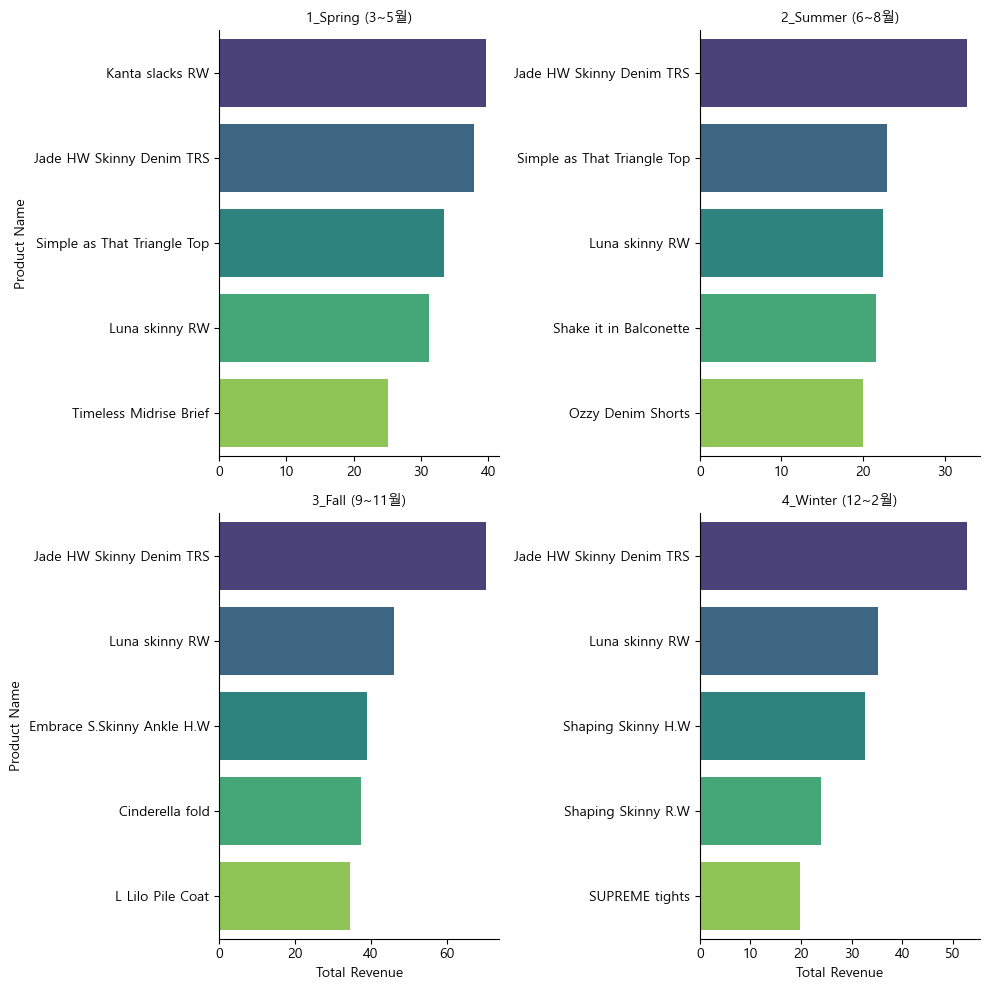

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 준비
if 'transactions' in locals() and 'articles' in locals():
    # 데이터 복사 및 병합
    if 'df_merged' in locals():
        df = df_merged.copy()
    else:
        tx_small = transactions[['t_dat', 'article_id', 'price']].copy()
        art_small = articles[['article_id', 'prod_name', 'product_group_name']].copy()
        df = pd.merge(tx_small, art_small, on='article_id', how='left')

    # 2. 날짜 변환 및 시즌 정의 함수 적용
    df['t_dat'] = pd.to_datetime(df['t_dat'])
    df['month'] = df['t_dat'].dt.month

    def get_season(month):
        if month in [3, 4, 5]: return '1_Spring (3~5월)'
        elif month in [6, 7, 8]: return '2_Summer (6~8월)'
        elif month in [9, 10, 11]: return '3_Fall (9~11월)'
        else: return '4_Winter (12~2월)'

    df['Season'] = df['month'].apply(get_season)

    # 3. [오류 수정된 부분] 시즌별 매출 집계
    # 끝에 .reset_index(name='total_revenue') 까지 한 줄에 다 들어가야 합니다.
    season_rev = df.groupby(['Season', 'prod_name', 'product_group_name'])['price'].sum().reset_index(name='total_revenue')

    # 4. 시즌별 Top 5 추출
    top5_season = season_rev.sort_values(['Season', 'total_revenue'], ascending=[True, False]).groupby('Season').head(5)

    # 5. 결과 출력
    print(":mostly_sunny: [시즌별 매출(Revenue) 효자 상품 Top 5]")
    print("=" * 60)

    pd.options.display.float_format = '{:.2f}'.format

    seasons = ['1_Spring (3~5월)', '2_Summer (6~8월)', '3_Fall (9~11월)', '4_Winter (12~2월)']

    for s in seasons:
        print(f"\n:pushpin: {s} Best Sellers:")
        # 해당 시즌 데이터가 있는지 확인 후 출력
        season_data = top5_season[top5_season['Season'] == s]
        if not season_data.empty:
            print(season_data[['prod_name', 'product_group_name', 'total_revenue']].to_string(index=False))
        else:
            print("데이터 없음")
        print("-" * 50)

    # 6. 시각화
    try:
        g = sns.FacetGrid(top5_season, col="Season", col_wrap=2, height=5, sharex=False, sharey=False)
        g.map_dataframe(sns.barplot, x="total_revenue", y="prod_name", palette="viridis")
        g.set_titles("{col_name}")
        g.set_axis_labels("Total Revenue", "Product Name")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"시각화 중 오류 발생 (데이터 부족 등): {e}")

else:
    print(":rotating_light: 데이터를 먼저 로드해주세요!")

--- 🔍 [1] 데이터 로드 및 기초 확인 ---
✅ 데이터 로드 및 전처리 완료: 총 1,048,575건

--- 📊 [2] 채널별 매출액 비중 분석 ---


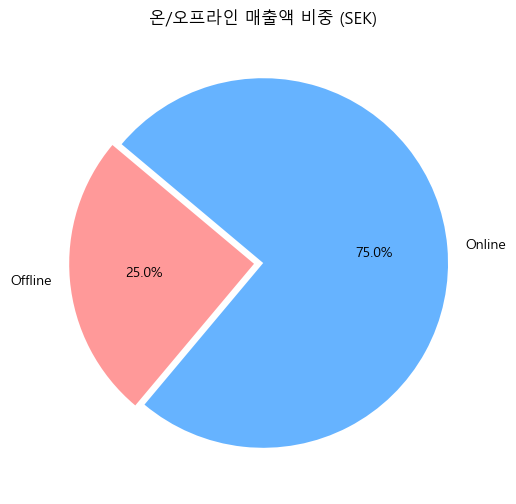


--- 🏆 [3] 채널별 Best Seller (Qty vs Rev) ---


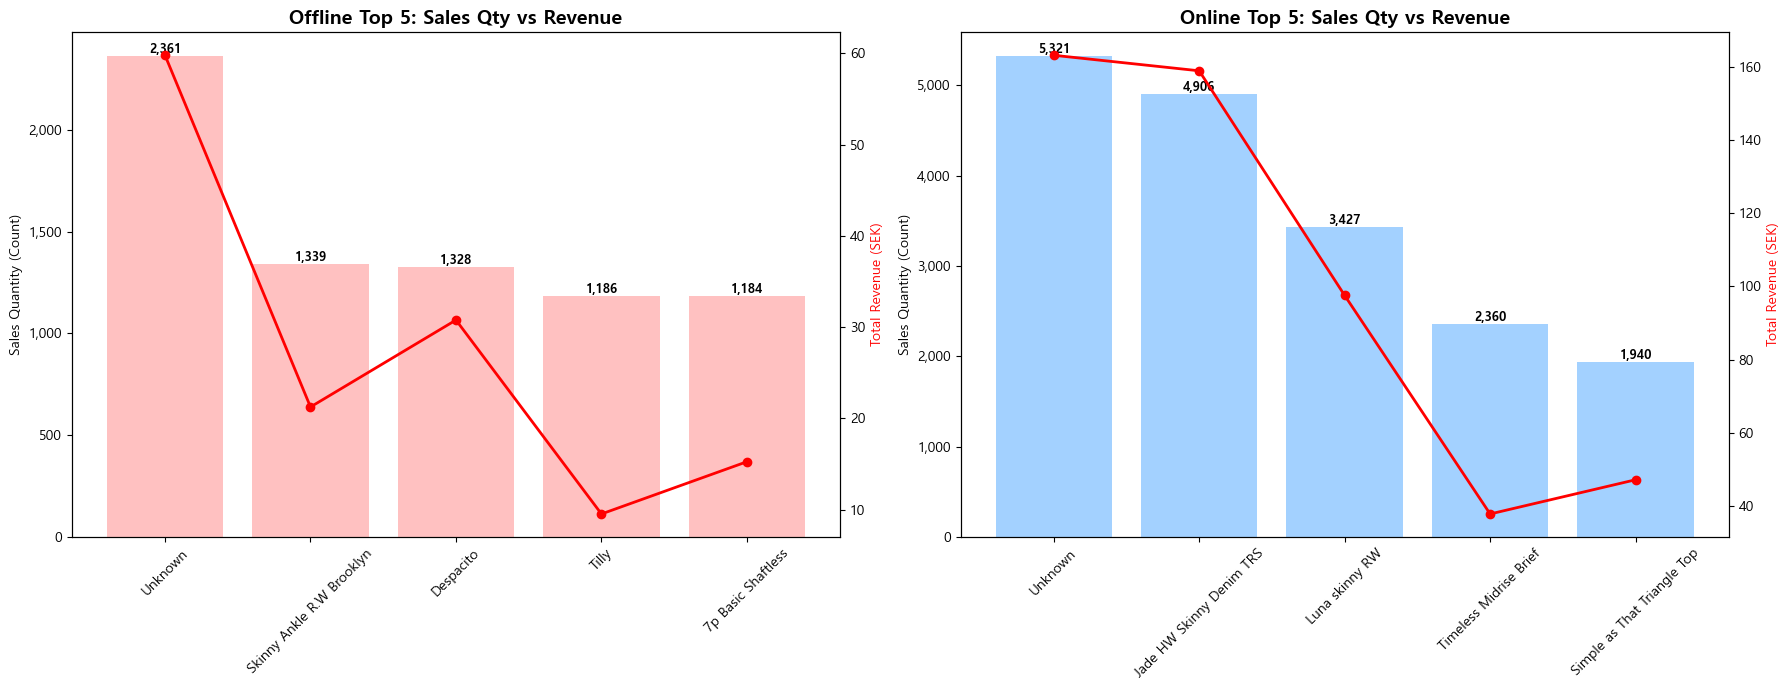


--- 🔄 [4] 채널별 순수 재구매율 분석 ---
👉 Online: 38.5% (재구매 고객 124,185명 / 전체 322,659명)
👉 Offline: 28.3% (재구매 고객 57,597명 / 전체 203,581명)

--- 🎫 [5] 온/오프라인 통합 프로모션 판별 로직 ---
✅ 프로모션 판별 완료!
할인적용건수 -> 온라인: 272,427회, 오프라인: 150,013회 (차이: 122,414회)
쿠폰적용건수 -> 온라인: 85,639회, 오프라인: 43,301회 (차이: 42,338회)
번들적용건수 -> 온라인: 77,234회, 오프라인: 8,981회 (차이: 68,253회)

--- 📈 [6] 채널별 프로모션 발생 건수 최종 비교 ---


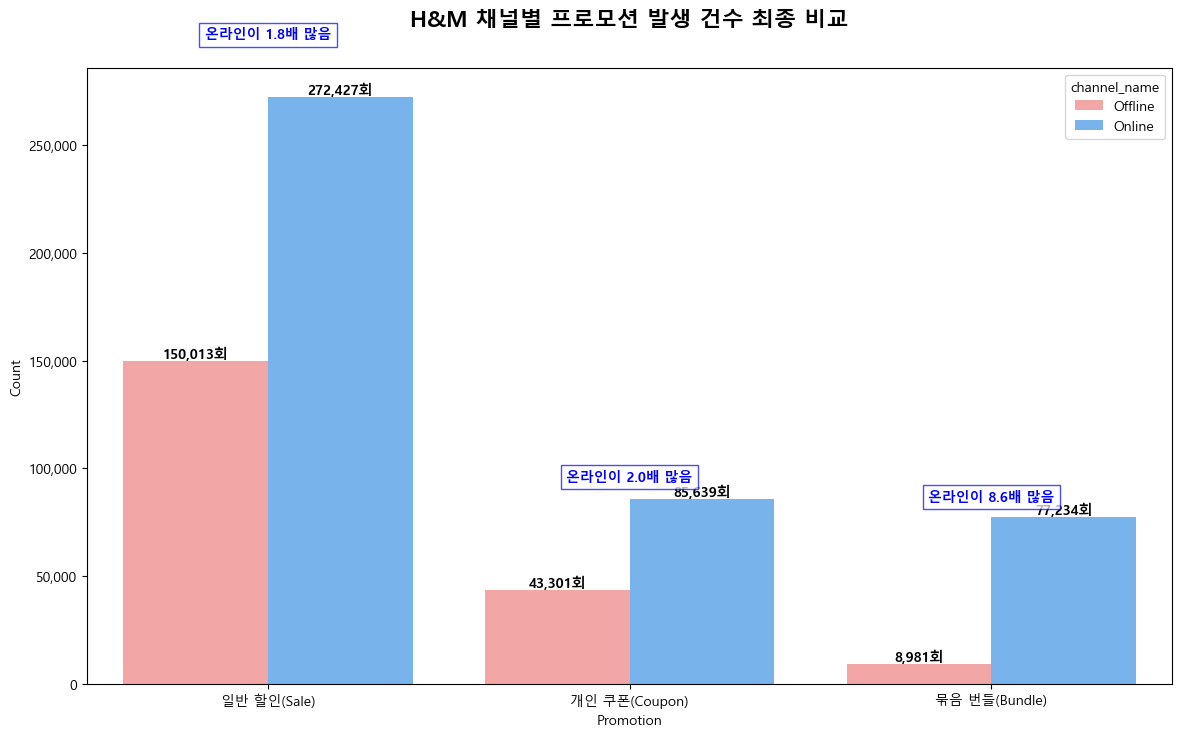


--- 💡 [7] 최종 비즈니스 인사이트 ---
1. 온라인은 오프라인보다 '번들 구매'가 8.6배 많아 대량 구매(박리다매)의 핵심 엔진임.
2. 오프라인은 개별 할인(Sale)으로 고객을 유입시키고, 온라인은 쿠폰과 번들로 객단가를 높이는 전략이 효과적임.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# [공통] 한글 폰트 및 마이너스 깨짐 방지 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ===========================================================
# [1] 데이터 로드 (파일명 _c 확인 완료)
# ===========================================================
print("--- 🔍 [1] 데이터 로드 및 기초 확인 ---")

# 파일 로드
df_tx = pd.read_csv('transactions_c.csv')
df_art = pd.read_csv('articles_c.csv', usecols=['article_id', 'prod_name'])

# 병합
df_main = pd.merge(df_tx, df_art, on='article_id', how='left')

# [수정] 전처리: 에러 유발하던 fillna(0) 제거 -> 안전한 방식으로 변경
df_main['prod_name'] = df_main['prod_name'].fillna('Unknown') # 상품명 없는건 'Unknown' 처리
df_main['channel_name'] = df_main['sales_channel_id'].map({1: 'Offline', 2: 'Online'})
df_main['t_dat'] = pd.to_datetime(df_main['t_dat'])

print(f"✅ 데이터 로드 및 전처리 완료: 총 {len(df_main):,}건")

# ===========================================================
# [2] 채널별 매출 비중 및 베스트셀러
# ===========================================================
# (1) 온/오프라인 매출액 비중 (원형 그래프)
print("\n--- 📊 [2] 채널별 매출액 비중 분석 ---")
channel_sales = df_main.groupby('channel_name')['price'].sum().reset_index()

plt.figure(figsize=(6, 6))
plt.pie(channel_sales['price'], labels=channel_sales['channel_name'], autopct='%1.1f%%',
        startangle=140, colors=['#FF9999', '#66B3FF'], explode=(0.05, 0))
plt.title('온/오프라인 매출액 비중 (SEK)')
plt.show()

# (2) 채널별 Best Seller TOP 5 (판매량 vs 매출액)
print("\n--- 🏆 [3] 채널별 Best Seller (Qty vs Rev) ---")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
plt.subplots_adjust(wspace=0.3)

for i, channel in enumerate(['Offline', 'Online']):
    subset = df_main[df_main['channel_name'] == channel]
    top_products = subset.groupby('prod_name').agg(
        qty=('article_id', 'count'),
        rev=('price', 'sum')
    ).sort_values(by='qty', ascending=False).head(5)

    ax1 = axes[i]
    color_bar = '#66B3FF' if channel == 'Online' else '#FF9999'
    ax1.set_title(f'{channel} Top 5: Sales Qty vs Revenue', fontsize=14, fontweight='bold')

    # 왼쪽 축: 판매 수량 (막대)
    bars = ax1.bar(top_products.index, top_products['qty'], color=color_bar, alpha=0.6)
    ax1.set_ylabel('Sales Quantity (Count)')
    ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax1.tick_params(axis='x', rotation=45)

    # 오른쪽 축: 매출액 (선)
    ax2 = ax1.twinx()
    ax2.plot(top_products.index, top_products['rev'], color='red', marker='o', linewidth=2)
    ax2.set_ylabel('Total Revenue (SEK)', color='red')

    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height, f'{int(height):,}',
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# (3) 채널별 재구매율 (동일인 중복 제거)
print("\n--- 🔄 [4] 채널별 순수 재구매율 분석 ---")
for channel in ['Online', 'Offline']:
    subset = df_main[df_main['channel_name'] == channel]
    cust_visits = subset.groupby('customer_id')['t_dat'].nunique()
    total_cust = len(cust_visits)
    re_cust = (cust_visits >= 2).sum()
    rate = (re_cust / total_cust) * 100 if total_cust > 0 else 0
    print(f"👉 {channel}: {rate:.1f}% (재구매 고객 {re_cust:,}명 / 전체 {total_cust:,}명)")

# ===========================================================
# [5] 프로모션 판별
# ===========================================================
print("\n--- 🎫 [5] 온/오프라인 통합 프로모션 판별 로직 ---")

# 1. 할인(Sale), 2. 쿠폰(Coupon), 3. 번들(Bundle) 판별
max_p = df_main.groupby('article_id')['price'].max()
df_main['is_sale'] = (df_main['article_id'].map(max_p) - df_main['price']) / df_main['article_id'].map(max_p) >= 0.05
df_main['daily_max'] = df_main.groupby(['t_dat', 'article_id'])['price'].transform('max')
df_main['is_coupon'] = df_main['price'] < df_main['daily_max']
df_main['daily_qty'] = df_main.groupby(['t_dat', 'customer_id'])['article_id'].transform('count')
df_main['is_bundle'] = df_main['daily_qty'] >= 3

# 요약 출력
promo_counts = df_main.groupby('channel_name')[['is_sale', 'is_coupon', 'is_bundle']].sum()
print("✅ 프로모션 판별 완료!")
for col, label in zip(['is_sale', 'is_coupon', 'is_bundle'], ['할인적용건수', '쿠폰적용건수', '번들적용건수']):
    off_val, on_val = int(promo_counts.loc['Offline', col]), int(promo_counts.loc['Online', col])
    print(f"{label} -> 온라인: {on_val:,}회, 오프라인: {off_val:,}회 (차이: {on_val-off_val:,}회)")

# ===========================================================
# [6] 채널별 격차 시각화
# ===========================================================
print("\n--- 📈 [6] 채널별 프로모션 발생 건수 최종 비교 ---")
promo_plot_data = promo_counts.reset_index().melt(id_vars='channel_name', var_name='Promotion', value_name='Count')

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=promo_plot_data, x='Promotion', y='Count', hue='channel_name', palette={'Offline': '#ff9999', 'Online': '#66b3ff'})

for i, label in enumerate(['is_sale', 'is_coupon', 'is_bundle']):
    off_val, on_val = promo_counts.loc['Offline', label], promo_counts.loc['Online', label]
    ax.annotate(f'{int(on_val):,}회', (i + 0.2, on_val), ha='center', va='bottom', fontweight='bold')
    ax.annotate(f'{int(off_val):,}회', (i - 0.2, off_val), ha='center', va='bottom', fontweight='bold')

    ratio = on_val / off_val if off_val > 0 else 0
    ax.text(i, max(off_val, on_val) * 1.1, f'온라인이 {ratio:.1f}배 많음',
            ha='center', color='blue', fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='blue'))

plt.title('H&M 채널별 프로모션 발생 건수 최종 비교', fontsize=16, fontweight='bold', pad=30)
plt.xticks([0, 1, 2], ['일반 할인(Sale)', '개인 쿠폰(Coupon)', '묶음 번들(Bundle)'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

# ===========================================================
# [7] 최종 전략 제언
# ===========================================================
print("\n--- 💡 [7] 최종 비즈니스 인사이트 ---")
print("1. 온라인은 오프라인보다 '번들 구매'가 8.6배 많아 대량 구매(박리다매)의 핵심 엔진임.")
print("2. 오프라인은 개별 할인(Sale)으로 고객을 유입시키고, 온라인은 쿠폰과 번들로 객단가를 높이는 전략이 효과적임.")

🔄 [1/4] 데이터 로드 및 병합 중...
✅ 데이터 병합 완료
🔄 [2/4] 2019년 데이터 필터링 및 계절 분류 중...
💰 [3/4] 계절별/채널별 매출 TOP 5 선정 중...
📈 [4/4] 그래프 생성 중...


C:\Users\usiro\AppData\Local\Temp\ipykernel_8984\565885089.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


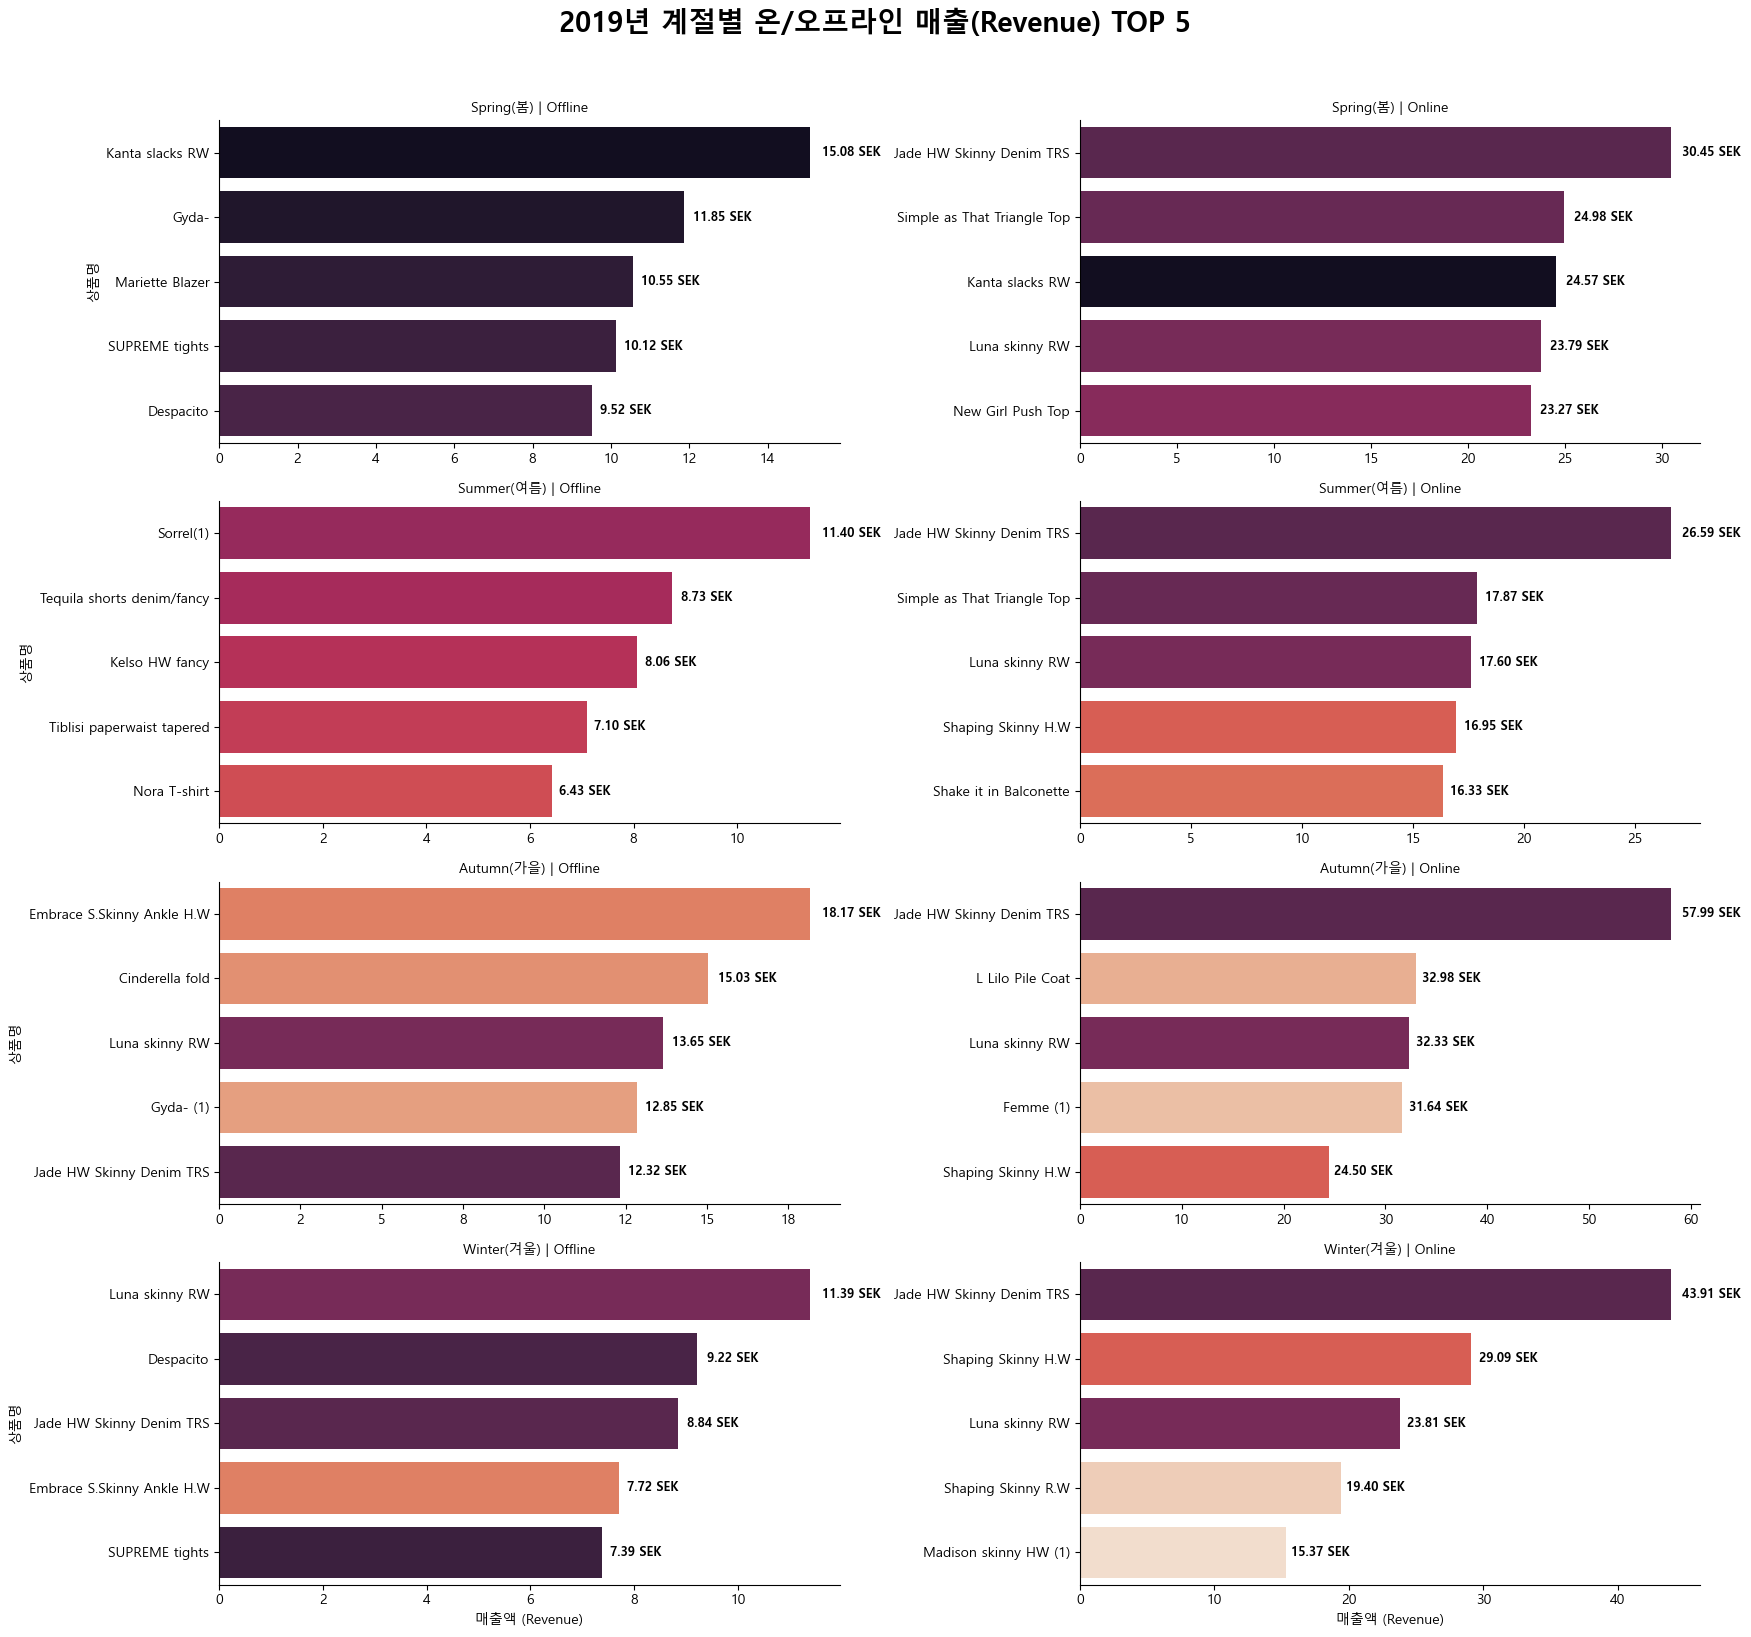

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm

# [Step 0] 한글 폰트 설정 (Windows: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("🔄 [1/4] 데이터 로드 및 병합 중...")

try:
    # 1. 데이터 로드 (파일명 _c 로 변경 완료!)
    df_tx = pd.read_csv('transactions_c.csv')
    df_art = pd.read_csv('articles_c.csv', usecols=['article_id', 'prod_name'])
    
    # 2. 데이터 병합 (Transaction + Article)
    df_all = pd.merge(df_tx, df_art, on='article_id', how='left')
    
    # 3. 날짜 데이터 처리
    df_all['t_dat'] = pd.to_datetime(df_all['t_dat'])
    df_all['year'] = df_all['t_dat'].dt.year 
    df_all['month'] = df_all['t_dat'].dt.month
    
    print("✅ 데이터 병합 완료")

except FileNotFoundError:
    print("❌ 파일을 찾을 수 없습니다. csv 파일 경로와 이름을 확인해주세요.")

# -----------------------------------------------------------
# [Step 2] 2019년 데이터 필터링 및 전처리
# -----------------------------------------------------------
if 'df_all' in locals():
    print("🔄 [2/4] 2019년 데이터 필터링 및 계절 분류 중...")

    # 1. 2019년만 추출
    df_2019_all = df_all[df_all['year'] == 2019].copy()
    df_2019_all['revenue'] = df_2019_all['price'] # 매출액 컬럼 생성

    # 2. 채널 매핑 (1: Offline, 2: Online)
    if 'sales_channel_id' in df_2019_all.columns:
        df_2019_all['channel_name'] = df_2019_all['sales_channel_id'].map({1: 'Offline', 2: 'Online'})
    else:
        df_2019_all['channel_name'] = 'Unknown'

    # 3. 계절 정의 및 적용
    def get_season(month):
        if month in [3, 4, 5]: return 'Spring(봄)'
        elif month in [6, 7, 8]: return 'Summer(여름)'
        elif month in [9, 10, 11]: return 'Autumn(가을)'
        else: return 'Winter(겨울)'

    df_2019_all['season'] = df_2019_all['month'].map(get_season)
    season_order = ['Spring(봄)', 'Summer(여름)', 'Autumn(가을)', 'Winter(겨울)']
    df_2019_all['season'] = pd.Categorical(df_2019_all['season'], categories=season_order, ordered=True)

    # -----------------------------------------------------------
    # [Step 3] 매출액(Revenue) 기준 TOP 5 선정
    # -----------------------------------------------------------
    print("💰 [3/4] 계절별/채널별 매출 TOP 5 선정 중...")

    seasonal_revenue = df_2019_all.groupby(['season', 'channel_name', 'prod_name'])['revenue'].sum().reset_index()

    top5_seasonal = (
        seasonal_revenue
        .sort_values(['season', 'channel_name', 'revenue'], ascending=[True, True, False])
        .groupby(['season', 'channel_name'])
        .head(5)
    )

    # -----------------------------------------------------------
    # [Step 4] 시각화 (SEK 단위 포함)
    # -----------------------------------------------------------
    print("📈 [4/4] 그래프 생성 중...")

    g = sns.catplot(
        data=top5_seasonal,
        x='revenue',     
        y='prod_name',   
        col='channel_name', 
        row='season',
        kind='bar',
        sharey=False,    
        sharex=False,    
        height=4, 
        aspect=2.2,
        palette='rocket'
    )

    g.fig.suptitle('2019년 계절별 온/오프라인 매출(Revenue) TOP 5', fontsize=20, fontweight='bold', y=1.02)
    g.set_axis_labels("매출액 (Revenue)", "상품명")
    g.set_titles(row_template="{row_name}", col_template="{col_name}")

    # 막대 끝에 "SEK" 단위 붙이기
    for ax in g.axes.flat:
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        for p in ax.patches:
            width = p.get_width()
            if width > 0:
                ax.text(width * 1.02, 
                        p.get_y() + p.get_height()/2, 
                        f'{width:,.2f} SEK', 
                        va='center', 
                        fontsize=9, 
                        fontweight='bold', 
                        color='black')

    plt.tight_layout()
    plt.show()